<span style='color:#008000; font-size:20pt; font-weight:bold'>Import Libraries</span>

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re

# pd.set_option('display.max_rows', None) # This code will display all of the dataframe
pd.reset_option('all') # Reset to default

C:\Users\84943\AppData\Local\Temp\ipykernel_25720\2787720865.py:9: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all') # Reset to default
C:\Users\84943\AppData\Local\Temp\ipykernel_25720\2787720865.py:9: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all') # Reset to default


<span style='color:#008000; font-size:20pt; font-weight:bold'>Loading Dataset</span>

In [3]:
movies = pd.read_csv('Movie-Recommendation-System-on-MovieLens/movielens-1m/movies.dat', sep='::', engine='python', 
                        names=['movieId', 'title', 'genres'], encoding='ISO-8859-1')

In [4]:
movies_with_des = pd.read_csv('movielens_movies_with_descriptions.csv', sep=',')

In [5]:
users = pd.read_csv('Movie-Recommendation-System-on-MovieLens/movielens-1m/users.dat', sep='::', engine='python',
                    names=['userId', 'gender', 'age', 'occupation', 'zip-code'], encoding='ISO-8859-1')

In [6]:
ratings = pd.read_csv('Movie-Recommendation-System-on-MovieLens/movielens-1m/ratings.dat',
                      sep='::', engine='python', 
                      names=['userId', 'movieId', 'rating', 'timestamp'], encoding='ISO-8859-1')

<span style='color:#008000; font-size:20pt; font-weight:bold'>Data Exploration</span>

<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Movies</span>

In [75]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [76]:
movies.tail()

,movieId,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [77]:
len(movies['title'].unique().tolist())

3883

In [78]:
# Number of genres for each movie
movies['genres'].apply(lambda x: len(x.split('|'))).value_counts()

genres
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: count, dtype: int64

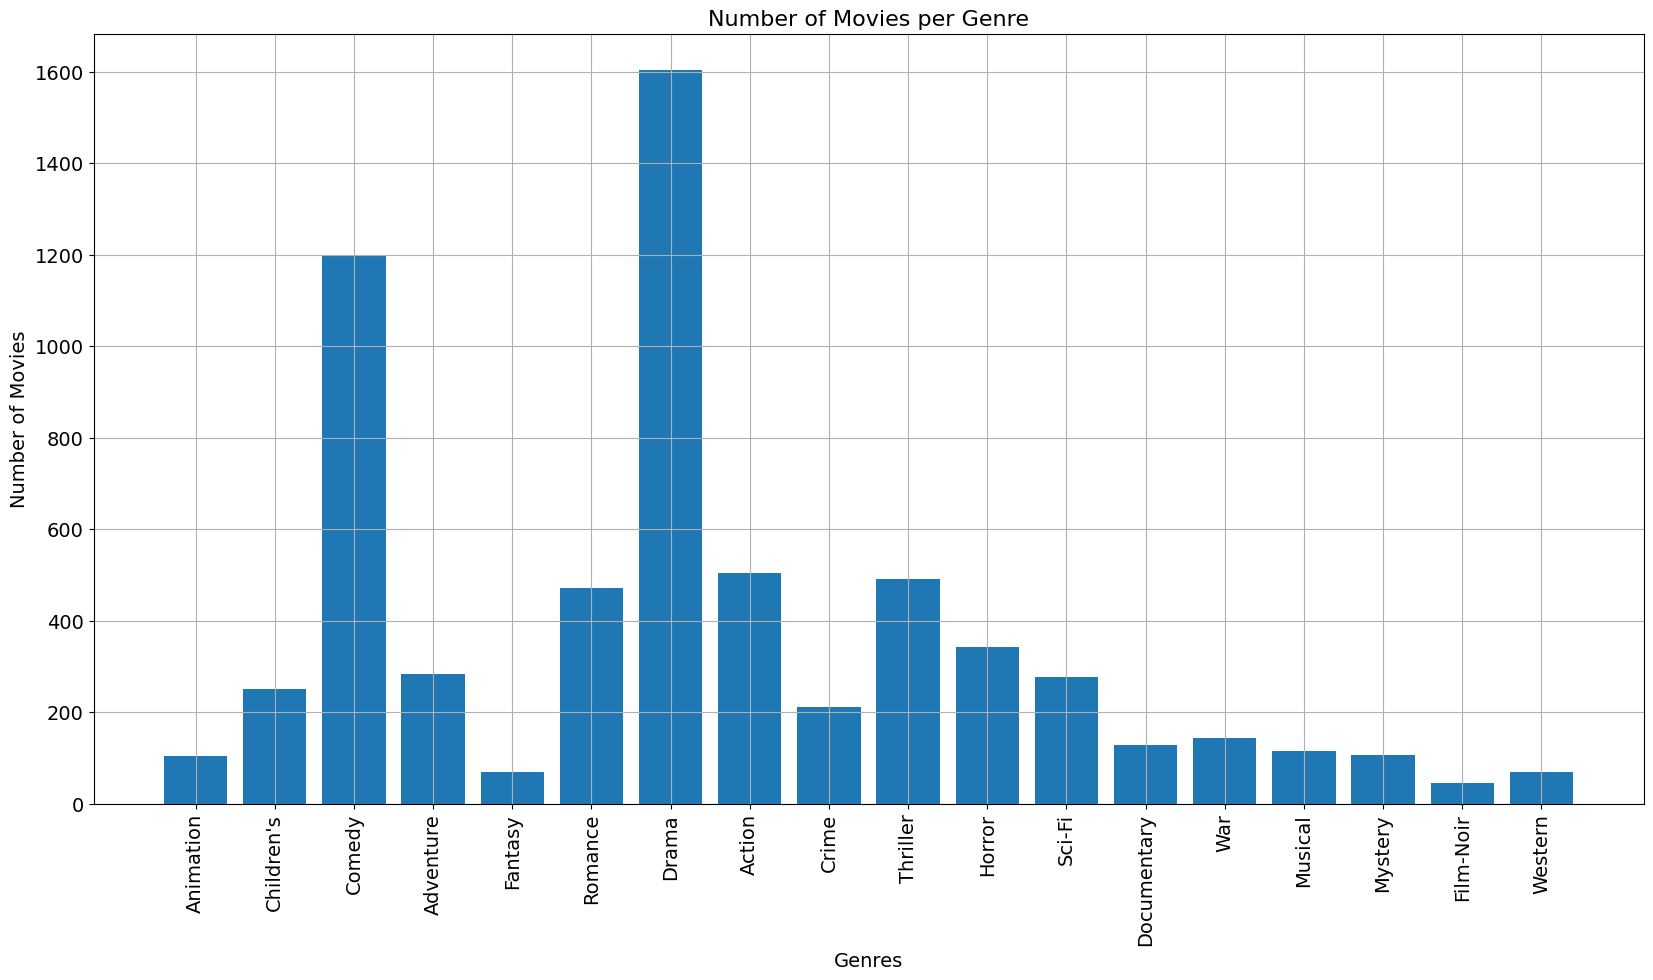

In [79]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies['genres']:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1

plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=90)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies per Genre', fontsize=16)
plt.grid(True)
plt.show()

In [80]:
movies.nunique()


movieId    3883
title      3883
genres      301
dtype: int64

<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Movies with Description</span>

In [81]:
movies_with_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieId      3883 non-null   int64 
 1   title        3883 non-null   object
 2   genres       3883 non-null   object
 3   year         3883 non-null   int64 
 4   description  3883 non-null   object
dtypes: int64(2), object(3)
memory usage: 151.8+ KB


In [82]:
movies_with_des.nunique()

movieId        3883
title          3841
genres          301
year             81
description    3504
dtype: int64

<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Users</span>

In [83]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userId      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [84]:
users['gender'].value_counts()

gender
M    4331
F    1709
Name: count, dtype: int64

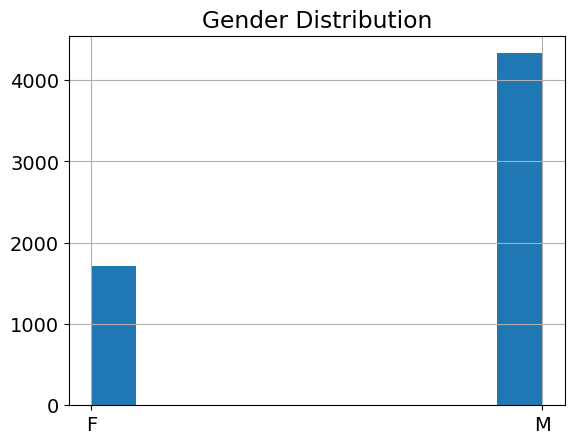

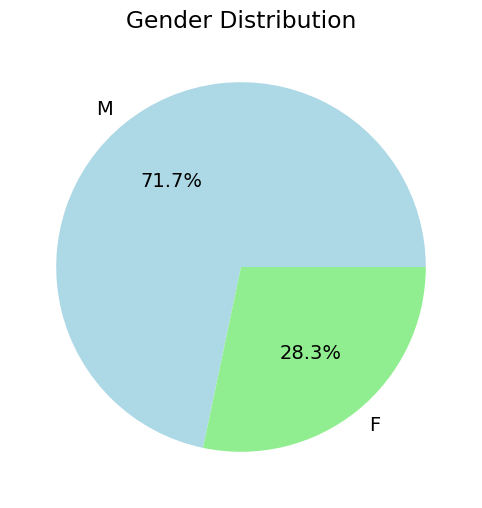

In [120]:
users['gender'].hist()
plt.title("Gender Distribution")
plt.show()

# Phân phối người dùng theo giới tính
user_gender_distribution = users['gender'].value_counts()

plt.figure(figsize=(8, 6))
user_gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

C:\Users\84943\AppData\Local\Temp\ipykernel_10032\2758260896.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.values,


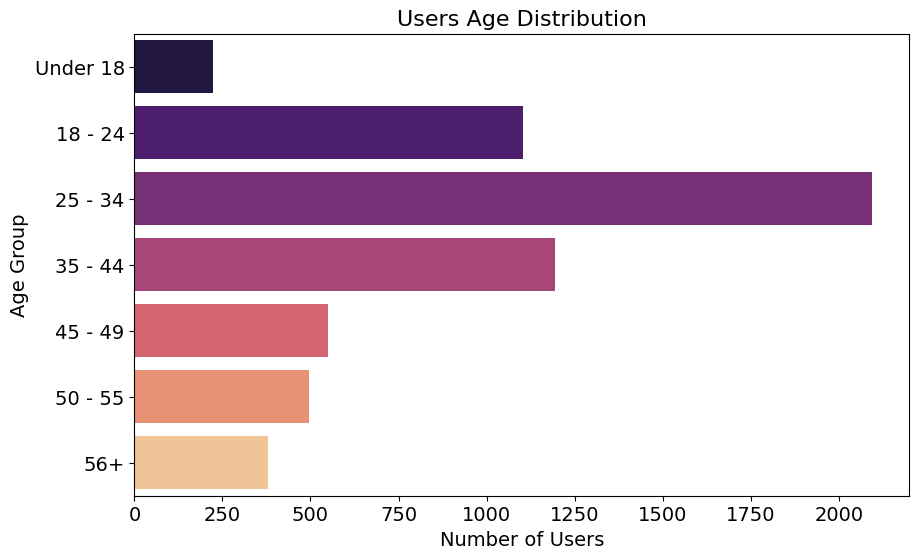

In [ ]:
# users['age'].hist(edgecolor='black')

age_reindex = ['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 49', '50 - 55', '56+']

age_counts = users['age'].value_counts().reindex(age_reindex)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.values,
            y=age_counts.index,
            palette='magma').set_title('Users Age Distribution', fontsize=16)

# Add number of users for each bar
# for i, value in enumerate(age_counts.values):
#     plt.text(value + 0.5, i, str(value), va='center', fontsize=12)

plt.xlabel('Number of Users', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()

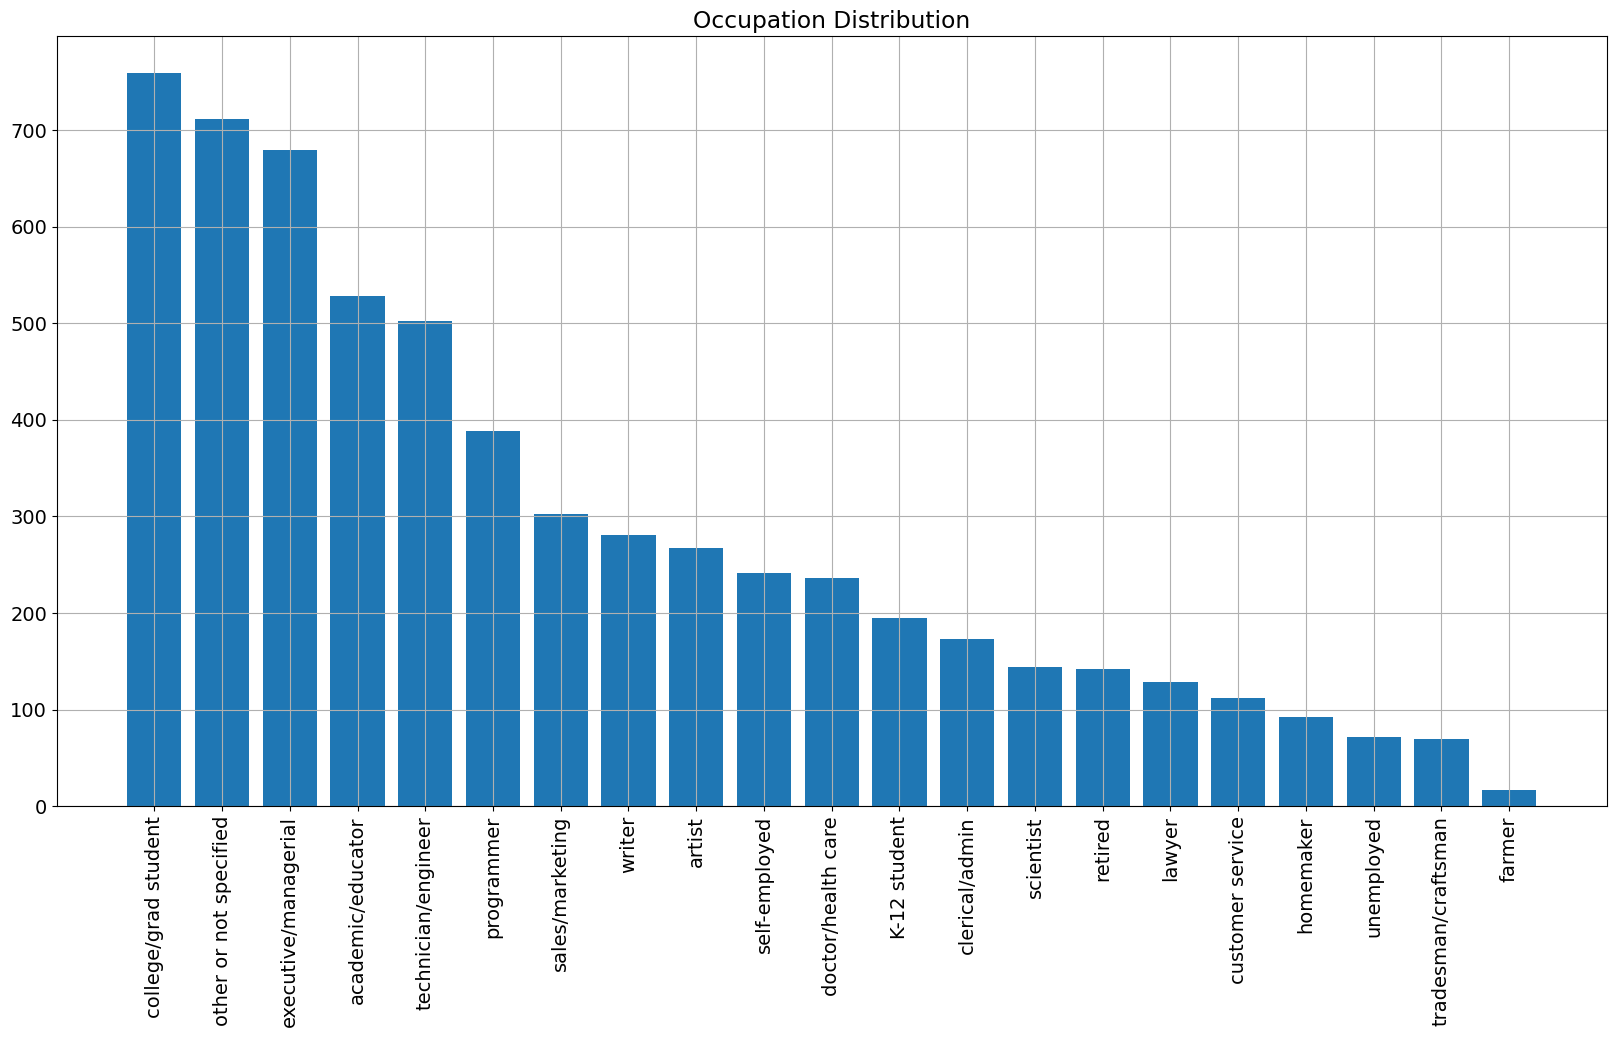

In [87]:
occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = users["occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}


matplotlib.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Occupation Distribution")
plt.show()

In [ ]:
# Merging btw user_df and rating_df
merged_df = pd.merge(ratings, users, on='userId')

# Average Rating by Age Group
age_rating_avg = pd.merge(ratings, users, on='userId').groupby('age')['rating'].mean()
print("Average Rating by Age Group:\n", age_rating_avg)

Average Rating by Age Group:
 age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64


In [ ]:
# Average Rating by Occupation
occupation_rating_avg = merged_df.groupby('occupation')['rating'].mean()
print("Average Rating by Occupation:\n", occupation_rating_avg)


Average Rating by Occupation:
 occupation
0     3.537544
1     3.576642
2     3.573081
3     3.656516
4     3.536793
5     3.537529
6     3.661578
7     3.599772
8     3.466741
9     3.656589
10    3.532675
11    3.617371
12    3.654001
13    3.781736
14    3.618481
15    3.689774
16    3.596575
17    3.613574
18    3.530117
19    3.414050
20    3.497392
Name: rating, dtype: float64


In [ ]:
# Average Rating by Gender
gender_rating_avg = merged_df.groupby('gender')['rating'].mean()
print("Average Rating by Gender:\n", gender_rating_avg)


Average Rating by Gender:
 gender
F    3.620366
M    3.568879
Name: rating, dtype: float64


<span style='color:#007ACC; font-size:15pt; font-weight:bold'>Ratings</span>

In [91]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [92]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [93]:
print(f'Minimum rating: {ratings['rating'].min()}')
print(f'Maximum rating: {ratings['rating'].max()}')

Minimum rating: 1
Maximum rating: 5


Text(0.5, 1.0, 'Rating Distribution')

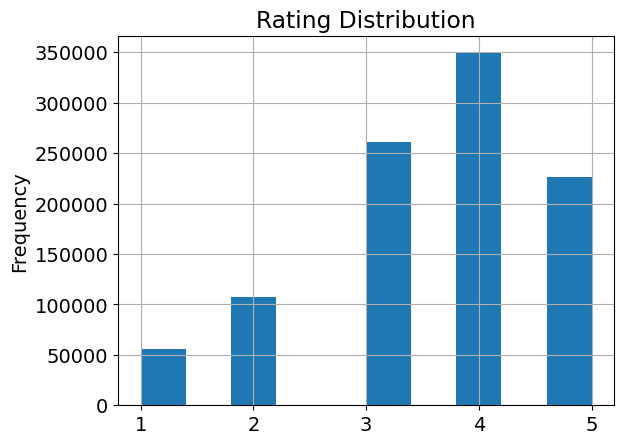

In [117]:
ratings['rating'].plot.hist().grid(True)
plt.title("Rating Distribution")

In [95]:
ratings['userId'].value_counts()

userId
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5380      20
2696      20
2673      20
572       20
4749      20
Name: count, Length: 6040, dtype: int64

In [96]:
ratings['movieId'].value_counts()

movieId
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3376       1
311        1
2845       1
3607       1
2909       1
Name: count, Length: 3706, dtype: int64

In [ ]:
# Calculate the sparsity of the user-item matrix
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_ratings = len(ratings)
sparsity = 1 - (num_ratings / (num_users * num_movies))

print(f"Tỷ lệ sparsity của ma trận user-item: {sparsity:.2%}")

Tỷ lệ sparsity của ma trận user-item: 95.53%


In [ ]:
# Check the distribution of ratings for each user
user_ratings_variance = ratings.groupby('userId')['rating'].var()
# Users have low variability in ratings rating
users_low_variance = user_ratings_variance[user_ratings_variance < 0.1]
print(f"Users with low rating variance:\n{users_low_variance}")


Users with low rating variance:
userId
283     0.037037
2339    0.043478
3598    0.015385
4486    0.096471
Name: rating, dtype: float64


In [ ]:
merged_df = pd.merge(ratings, movies, on='movieId')

# Calculate average rating by genre
genre_rating_avg = merged_df.explode('genres').groupby('genres')['rating'].mean()
print(f"Average Rating by Genre:\n{genre_rating_avg}")

Average Rating by Genre:
genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
                                                   ...   
Sci-Fi|Thriller|War                              3.439286
Sci-Fi|War                                       4.449890
Thriller                                         3.555879
War                                              3.889001
Western                                          3.853226
Name: rating, Length: 301, dtype: float64


In [100]:
movie_with_ratings = pd.merge(movies, ratings, on='movieId')

# Most rated movies
most_rated_movies = movie_with_ratings.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(f"Most rated movies:\n{most_rated_movies}")


Most rated movies:
title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: rating, dtype: int64


In [101]:
year_rating_avg = pd.merge(movies_with_des, ratings, on='movieId').groupby('year')['rating'].mean()
print(f"Average Rating by Year:\n{year_rating_avg}")

Average Rating by Year:
year
1919    3.466667
1920    3.666667
1921    3.790323
1922    3.991597
1923    3.117647
          ...   
1996    3.388502
1997    3.411654
1998    3.457729
1999    3.496459
2000    3.373341
Name: rating, Length: 81, dtype: float64


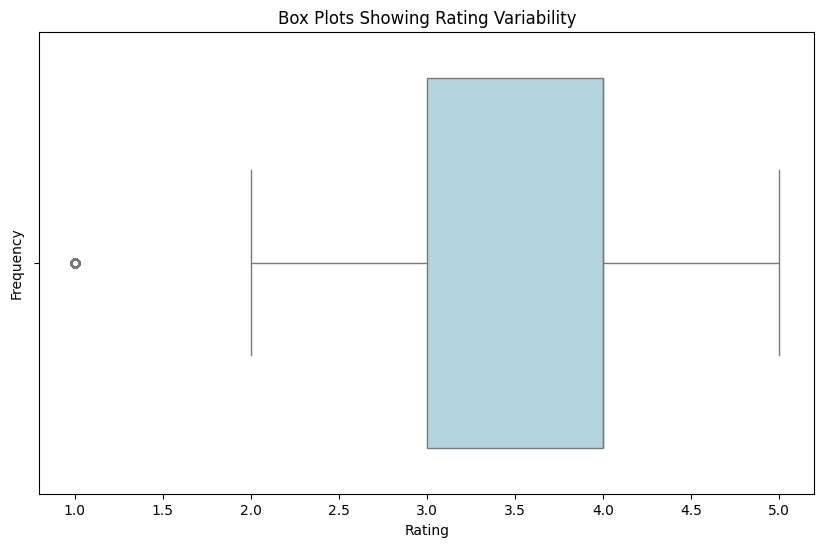

In [ ]:

# Draw boxplot for rating fluctuations
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=ratings, color='lightblue')
plt.title('Box Plots Showing Rating Variability')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<span style='color:#008000; font-size:20pt; font-weight:bold'>Merge Datasets and Splitting</span>

In [102]:
ratings.drop(['timestamp'], axis=1, inplace=True)
users.drop(['zip-code'], axis=1, inplace=True)

In [103]:
ages_map = {1: 'Under 18',
            18: '18 - 24',
            25: '25 - 34',
            35: '35 - 44',
            45: '45 - 49',
            50: '50 - 55',
            56: '56+'}

occupations_map = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

users['age'] = users['age'].map(ages_map)
users['occupation'] = users['occupation'].map(occupations_map)

In [113]:
df = movies_with_des.merge(ratings, on='movieId', how='left').merge(users, on='userId', how='left')
df.shape

(1000386, 10)

In [ ]:
# Check whether the number of unique movies in movies_with_des is the same as in movies or not.
df['test_title'] = df['title'] + ' (' + df['year'].astype(str) + ')'
df[['test_title', 'title', 'year']].head()
df['test_title'].nunique()


3883

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données dans un rapport 80/20
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Size of training data: {len(train)}")
print(f"Size of testing data: {len(test)}")

Size of training data: 800167
Size of testing data: 200042
